In [39]:
import numpy as pd
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from scipy.stats import entropy
import numpy as np

from collections import Counter

In [40]:
adult_route = '../MachineLearning1/adult.csv'
adult = pd.read_csv(adult_route)

In [41]:
def my_entropy(df):
    val, cont = np.unique(df, return_counts=True)
    p = cont/np.sum(cont)
    plogp = np.log2(p)*p
    h = -np.sum(plogp)
    return h

In [42]:
def my_mutual_information(X, Y):
    n = len(X)
    valx, contX = np.unique(X, return_counts=True)
    valy, contY = np.unique(Y, return_counts=True)
    px = contX/np.sum(contX)
    py = contY/np.sum(contY)
    im = 0
    for ix, x in enumerate(valx):
        for iy, y in enumerate(valy):
            pxy = np.sum(np.logical_and(X==x, Y==y))
            if pxy == 0: continue
            pxy = pxy/n
            im += pxy*np.abs(np.log2(pxy/(px[ix]*py[iy])))
            return im

In [43]:
for cname in adult.columns.values:
    print(round(my_entropy(adult[cname]),5), cname)

5.68332 age
1.64798 workclass
2.93135 education
2.93135 education-num
1.83365 marital-status
3.5169 occupation
2.15442 relationship
0.79874 race
0.91574 sex
3.47956 hours-per-week
0.9438 native-country
0.79638 income


In [44]:
pair_matrix = np.zeros((adult.columns.size,adult.columns.size)).astype(float)

for i,coli in enumerate(adult.columns):
    for j,colj in enumerate(adult.columns):
        pair_matrix[i][j] = my_mutual_information(coli,colj)

pair_matrix_df = pd.DataFrame(pair_matrix, index=adult.columns, columns=adult.columns)

pair_matrix_df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
age,0.528321,0.528321,0.528321,0.528321,0.528321,0.528321,0.528321,0.528321,0.528321,0.528321,0.528321,0.528321
workclass,0.352214,0.352214,0.352214,0.352214,0.352214,0.352214,0.352214,0.352214,0.352214,0.352214,0.352214,0.352214
education,0.352214,0.352214,0.352214,0.352214,0.352214,0.352214,0.352214,0.352214,0.352214,0.352214,0.352214,0.352214
education-num,0.284649,0.284649,0.284649,0.284649,0.284649,0.284649,0.284649,0.284649,0.284649,0.284649,0.284649,0.284649
marital-status,0.271954,0.271954,0.271954,0.271954,0.271954,0.271954,0.271954,0.271954,0.271954,0.271954,0.271954,0.271954
occupation,0.332193,0.332193,0.332193,0.332193,0.332193,0.332193,0.332193,0.332193,0.332193,0.332193,0.332193,0.332193
relationship,0.298747,0.298747,0.298747,0.298747,0.298747,0.298747,0.298747,0.298747,0.298747,0.298747,0.298747,0.298747
race,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
sex,0.528321,0.528321,0.528321,0.528321,0.528321,0.528321,0.528321,0.528321,0.528321,0.528321,0.528321,0.528321
hours-per-week,0.271954,0.271954,0.271954,0.271954,0.271954,0.271954,0.271954,0.271954,0.271954,0.271954,0.271954,0.271954


Master degree %: 5.29


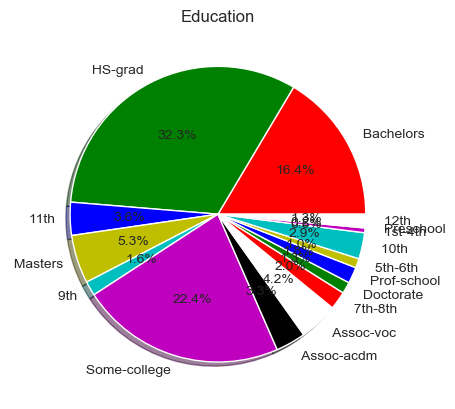

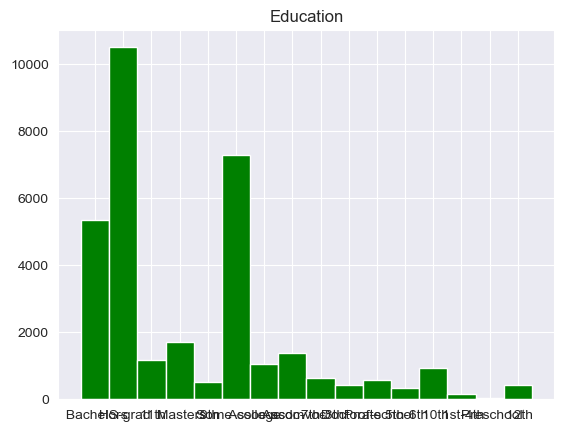

In [45]:
education_counter = Counter(adult.education.values)
labels = education_counter.keys()
education_counter = education_counter.values()

total_adults = adult.education.size
total_master_degrees = adult.education.value_counts()[' Masters']

master_degree_percentage = (total_master_degrees/total_adults)*100

figure,axis = plt.subplots()

plt.title('Education')
axis.pie(education_counter,labels=labels,colors=['r','g','b','y','c','m','k','w'],autopct='%1.1f%%',shadow=True, startangle=0)

figure,axis = plt.subplots()

plt.title('Education')
axis.bar(list(labels),education_counter, width=1.0, color='g')

print('Master degree %:', round(master_degree_percentage,2))

Females: 10771
Males: 21790
Females %: 33.08


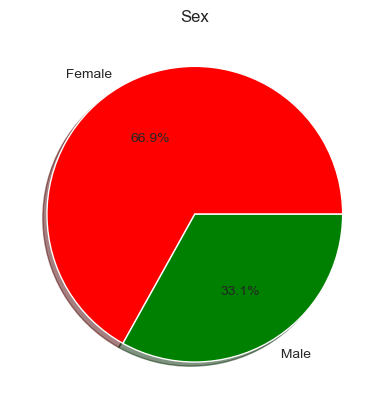

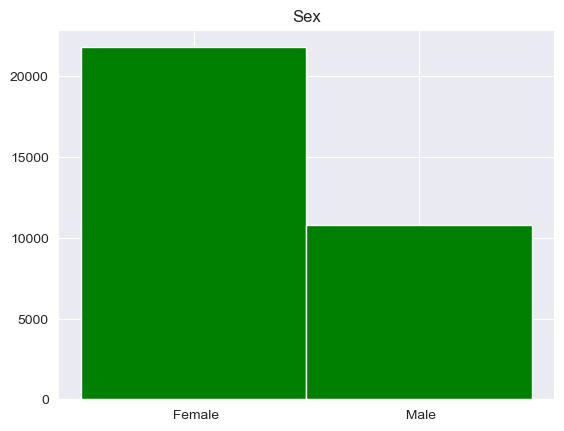

In [46]:
sex_labels = set(adult.sex.values)
sex_counter = Counter(adult.sex.values).values()

total_adults = adult.education.size
total_females = adult.sex.value_counts()[' Female']
total_males = adult.sex.value_counts()[' Male']

females_percentage = (total_females/total_adults)*100

figure,axis = plt.subplots()

plt.title('Sex')
axis.pie(sex_counter,labels=sex_labels,colors=['r','g','b','y','c','m','k','w'],autopct='%1.1f%%',shadow=True, startangle=0)

figure,axis = plt.subplots()

plt.title('Sex')
axis.bar(list(sex_labels),sex_counter, width=1.0, color='g')

print('Females:',total_females)
print('Males:',total_males)
print('Females %:', round(females_percentage,2))

Total white:  27816


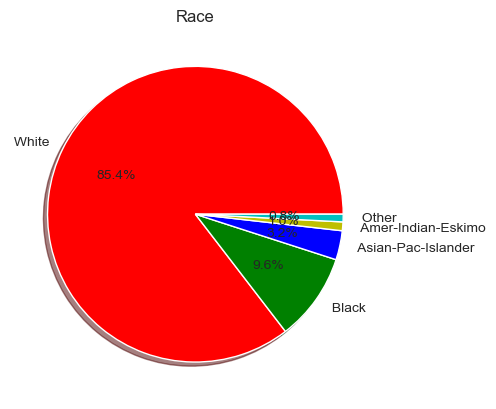

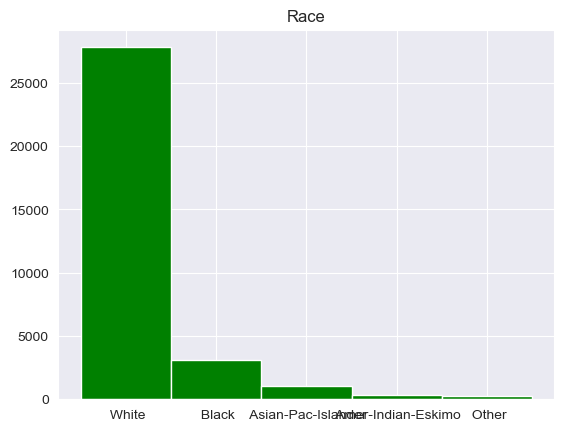

In [47]:
race_counter = Counter(adult.race.values)

print('Total white: ',race_counter[' White'])

race_labels = race_counter.keys()
race_counter = race_counter.values()

figure,axis = plt.subplots()

plt.title('Race')
axis.pie(race_counter,labels=race_labels,colors=['r','g','b','y','c','m','k','w'],autopct='%1.1f%%',shadow=True, startangle=0)

figure,axis = plt.subplots()

plt.title('Race')
axis.bar(race_labels,race_counter,width=1.0,color='g')

plt.show()

Adults with income >50K:  7841


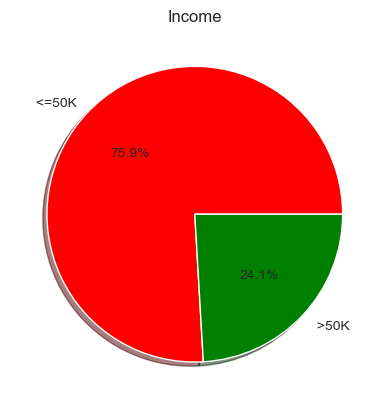

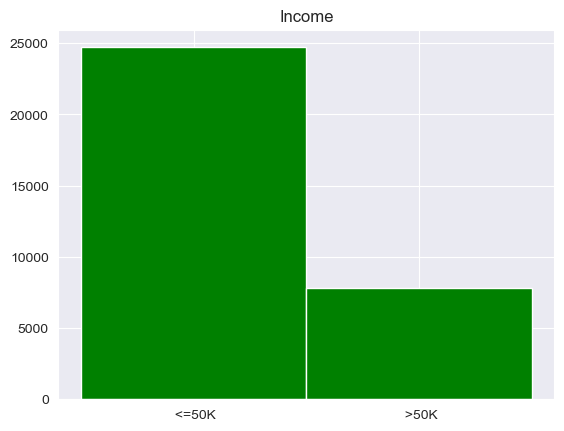

In [48]:
income_counter = Counter(adult.income.values)

print('Adults with income >50K: ',income_counter[' >50K'])

income_labels = income_counter.keys()
income_counter = income_counter.values()

figure,axis = plt.subplots()

plt.title('Income')
axis.pie(income_counter,labels=income_labels,colors=['r','g','b','y','c','m','k','w'],autopct='%1.1f%%',shadow=True, startangle=0)

figure,axis = plt.subplots()

plt.title('Income')
axis.bar(income_labels,income_counter,width=1.0,color='g')

plt.show()

C:\Users\angel\AppData\Local\Temp\ipykernel_49916\2523293000.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  females_with_income_50K_plus = len(adult[adult['sex'] == ' Female'][adult['income'] == ' >50K'])
C:\Users\angel\AppData\Local\Temp\ipykernel_49916\2523293000.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  males_with_income_50K_plus = len(adult[adult['sex'] == ' Male'][adult['income'] == ' >50K'])


Females with income >50K %:  3.6209
Males with income >50K %:  20.4601


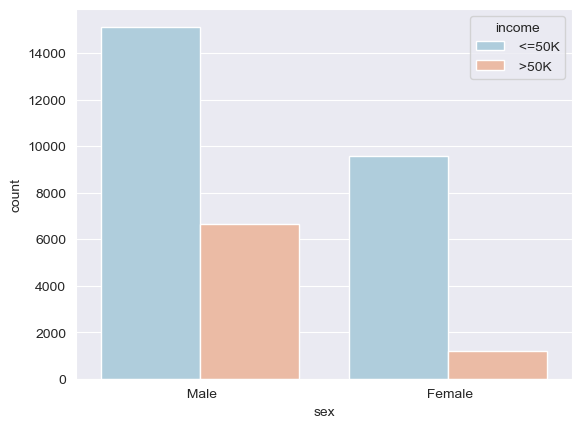

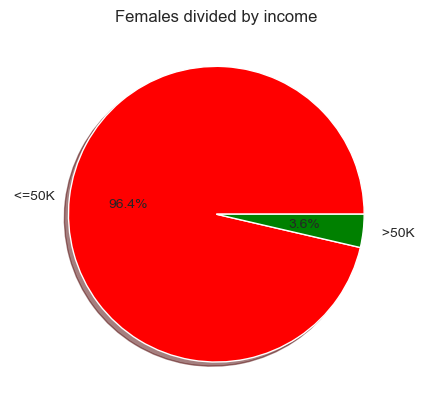

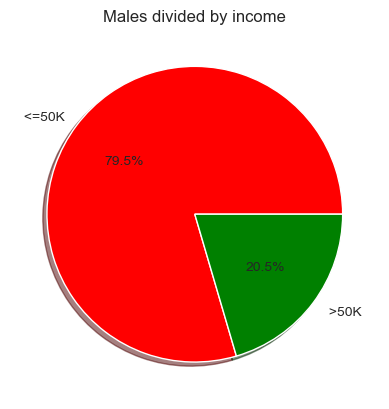

In [49]:
females_with_income_50K_plus = len(adult[adult['sex'] == ' Female'][adult['income'] == ' >50K'])
males_with_income_50K_plus = len(adult[adult['sex'] == ' Male'][adult['income'] == ' >50K'])

print('Females with income >50K %: ',round((females_with_income_50K_plus/total_adults)*100,4))
print('Males with income >50K %: ',round((males_with_income_50K_plus/total_adults)*100,4))

sns.countplot(x='sex',hue='income',data=adult,palette='RdBu_r')

figure,axis = plt.subplots()

plt.title('Females divided by income')
axis.pie((total_adults-females_with_income_50K_plus,females_with_income_50K_plus),labels=income_labels,colors=['r','g','b','y','c','m','k','w'],autopct='%1.1f%%',shadow=True, startangle=0)

figure,axis = plt.subplots()

plt.title('Males divided by income')
axis.pie((total_adults-males_with_income_50K_plus,males_with_income_50K_plus),labels=income_labels,colors=['r','g','b','y','c','m','k','w'],autopct='%1.1f%%',shadow=True, startangle=0)

plt.show()

C:\Users\angel\AppData\Local\Temp\ipykernel_49916\3681532078.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  marital_higher_50K = [len(adult[adult.relationship == col][adult.income == ' >50K']) for col in marital_statuses]
C:\Users\angel\AppData\Local\Temp\ipykernel_49916\3681532078.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  marital_lower_50K = [len(adult[adult.relationship == col][adult.income == ' <=50K']) for col in marital_statuses]


Most common marital state with income >50K:  Husband


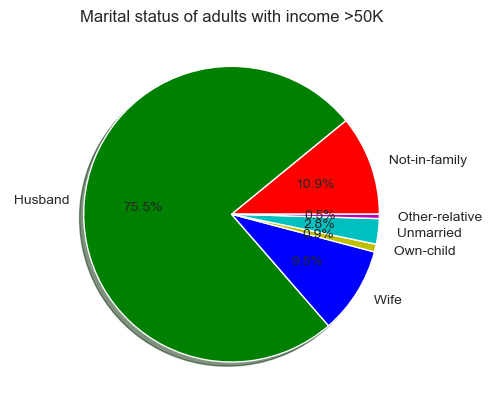

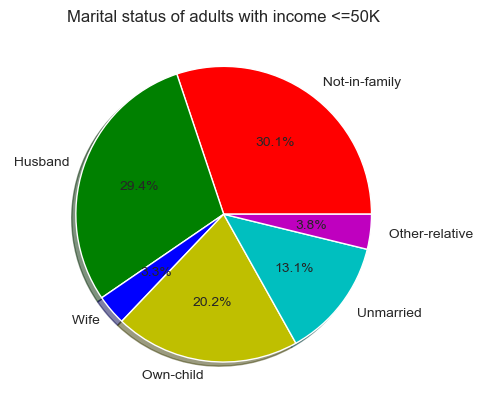

In [50]:
marital_statuses = adult.relationship.unique()
marital_higher_50K = [len(adult[adult.relationship == col][adult.income == ' >50K']) for col in marital_statuses]
marital_lower_50K = [len(adult[adult.relationship == col][adult.income == ' <=50K']) for col in marital_statuses]

print('Most common marital state with income >50K:',marital_statuses[marital_higher_50K.index(max(marital_higher_50K))])

figure,axis = plt.subplots()

plt.title('Marital status of adults with income >50K')
axis.pie(marital_higher_50K,labels=marital_statuses,colors=['r','g','b','y','c','m','k','w'],autopct='%1.1f%%',shadow=True, startangle=0)

figure,axis = plt.subplots()

plt.title('Marital status of adults with income <=50K')
axis.pie(marital_lower_50K,labels=marital_statuses,colors=['r','g','b','y','c','m','k','w'],autopct='%1.1f%%',shadow=True, startangle=0)

plt.show()

C:\Users\angel\AppData\Local\Temp\ipykernel_49916\1924466046.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occupation_higher_50K = [len(adult[adult.occupation == col][adult.income == ' >50K']) for col in occupations_list]
C:\Users\angel\AppData\Local\Temp\ipykernel_49916\1924466046.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occupation_lower_50K = [len(adult[adult.occupation == col][adult.income == ' <=50K']) for col in occupations_list]


Most common occupation with income >50K:  Exec-managerial


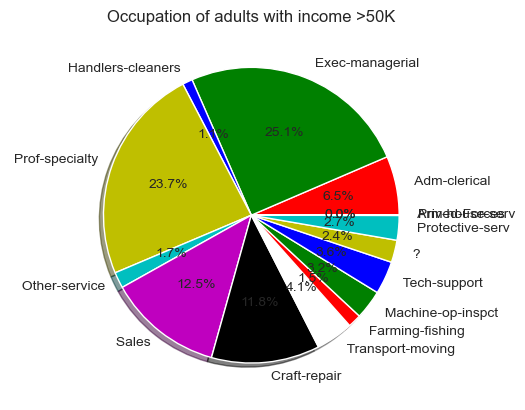

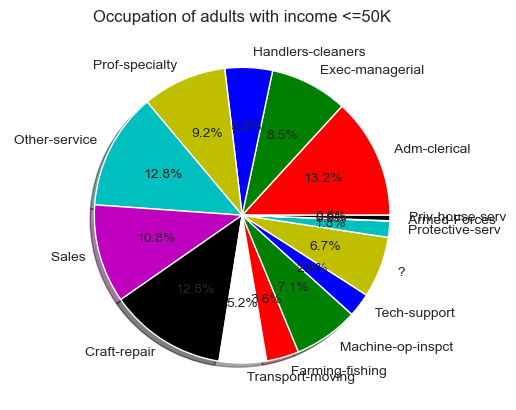

In [51]:
occupations_list = adult.occupation.unique()
occupation_higher_50K = [len(adult[adult.occupation == col][adult.income == ' >50K']) for col in occupations_list]
occupation_lower_50K = [len(adult[adult.occupation == col][adult.income == ' <=50K']) for col in occupations_list]

print('Most common occupation with income >50K:',occupations_list[occupation_higher_50K.index(max(occupation_higher_50K))])

figure,axis = plt.subplots()

plt.title('Occupation of adults with income >50K')
axis.pie(occupation_higher_50K,labels=occupations_list,colors=['r','g','b','y','c','m','k','w'],autopct='%1.1f%%',shadow=True, startangle=0)

figure,axis = plt.subplots()

plt.title('Occupation of adults with income <=50K')
axis.pie(occupation_lower_50K,labels=occupations_list,colors=['r','g','b','y','c','m','k','w'],autopct='%1.1f%%',shadow=True, startangle=0)

plt.show()